In [1]:
import numpy as np
import json
from matplotlib import pyplot as plt

In [2]:
def load_data(p: int, k: int) -> dict[dict[str, float], dict[str, float]]:
    with open(f"../../results/{p}_{k}_observed.json", "r") as f:
        line = f.readline()
        idx = line.index(']')
        observed_acceptance, observed_rejection = tuple(json.loads(line[:idx+1]))
        target_rejection, target_acceptance = tuple(json.loads(line[idx+1:]))
        observed = {
            'acceptance': observed_acceptance,
            'undefined': 1 - observed_acceptance - observed_rejection,
            'rejection': observed_rejection,
        }
        target = {
            'acceptance': target_acceptance,
            'rejection': target_rejection,
        }
        return {'observed': observed, 'tareget': target}

In [3]:
ps = [3, 5]
data_dict = {
    p: {k: load_data(p, k) for k in range(1, 11)}
    for p in ps
}

In [4]:
p = 5
labels = data_dict[p].keys()
observed_acceptances = np.array([data_dict[p][label]['observed']['acceptance'] for label in labels])
observed_rejections = np.array([data_dict[p][label]['observed']['rejection'] for label in labels])
xs = observed_acceptances

[0.40414951 0.39918948 0.38888158 0.39731916 0.40641381 0.40061868
 0.40125096 0.40271844 0.38227771 0.44499793]


<BarContainer object of 10 artists>

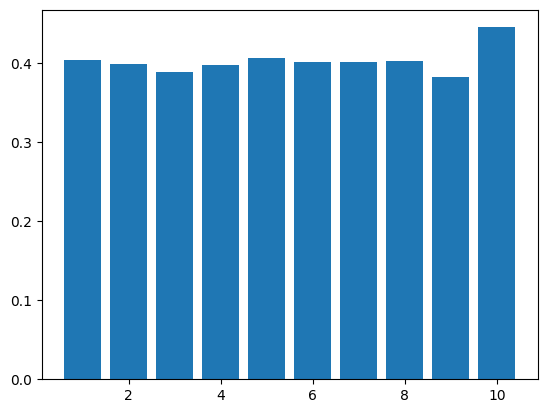

In [5]:
print(xs)
plt.bar(labels, xs)